### 문제정의
- 머신러닝을 통해서 어떤 문제를 해결할 것인가?
- 지도 vs 비지도 vs 강화
- 비만을 판단하는 모델(지도학습 - 분류)

### 데이터 수집
- csv파일로 이루어진 데이터 수집
- 500명의 성별, 키, 몸무게, 비만도 등급 등재

In [1]:
import pandas as pd
bmi = pd.read_csv('./data/bmi_500.csv') #csv파일 불러오기

### 데이터 전처리
- 결측치 처리 : 비어있는 데이터 채우기
- 이상치 처리 : 정상적인 범위를 벗어난 데이터 수정하기

#### 결측치 확인
- info 함수 사용

In [2]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 이상치 확인
- describe 함수 사용 : 수치형 데이터만 분석가능 

In [3]:
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석 (EDA)
- 데이터를 자세히 살펴보기
- 비만도별로 데이터가 잘 나뉘어 있는지

#### 비만도 등급 확인

In [4]:
# 중복 제거하고 값을 확인
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### Label이 Weak인 사람들만 추리기

In [5]:
# 불리언 인덱싱
bolWeak = bmi['Label']=='Weak'
scatter_data = bmi.loc[bolWeak]
scatter_data

,Gender,Height,Weight,Label
27,Male,187,62,Weak
31,Male,178,52,Weak
32,Female,195,65,Weak
51,Female,176,54,Weak
98,Male,195,69,Weak
200,Male,184,57,Weak
242,Male,191,62,Weak
269,Male,168,50,Weak
279,Male,188,57,Weak
280,Male,193,65,Weak


In [6]:
import matplotlib.pyplot as plt

#### Weak인 사람들을 그래프로 그리기

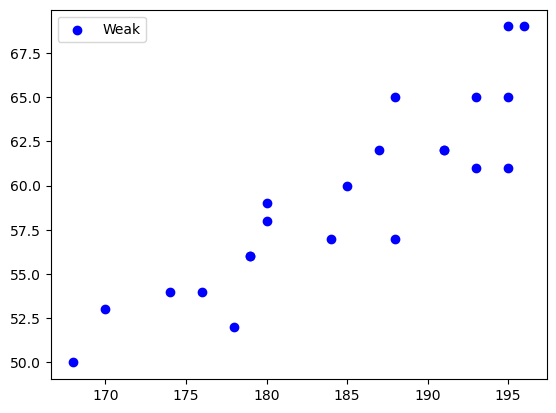

In [7]:
# plt.scatter(x,y) 산전도 그래프
plt.scatter(scatter_data['Height'],scatter_data['Weight'],color='blue',label='Weak')
plt.legend(loc = 'best') #차트에서 그린 label 출력
plt.show()

#### OverWeight 그래프 그리기
- 초록색으로 그리기

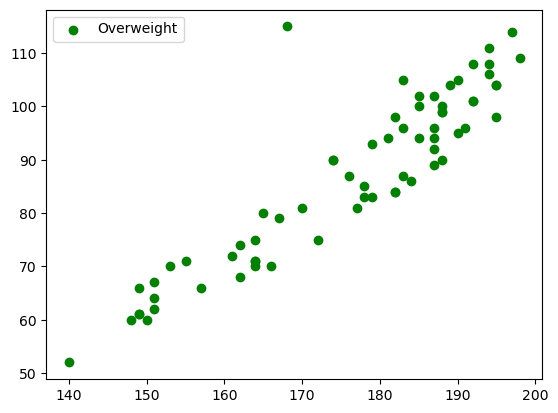

In [8]:
scatter_data2 = bmi[bmi['Label']=='Overweight']
plt.scatter(scatter_data2['Height'],scatter_data2['Weight'],color='green',label='Overweight')
plt.legend(loc='best')
plt.show()

#### 함수로 만들어서 그래프 그리기

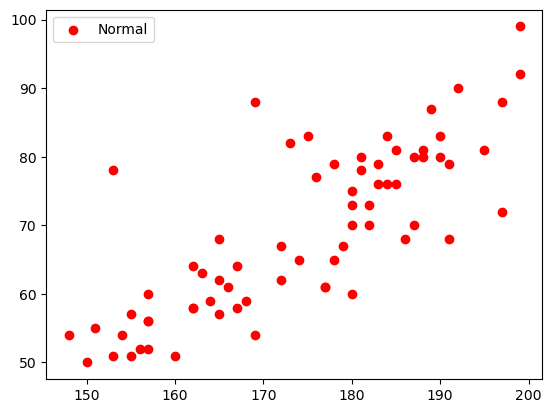

In [9]:
def myScatter(label,color):
    scatter_data3 = bmi[bmi['Label']==label]
    plt.scatter(scatter_data3['Height'],scatter_data3['Weight'],color=color,label=label)
    plt.legend(loc='best')
myScatter('Normal','red')

#### 전체 그래프 그리기

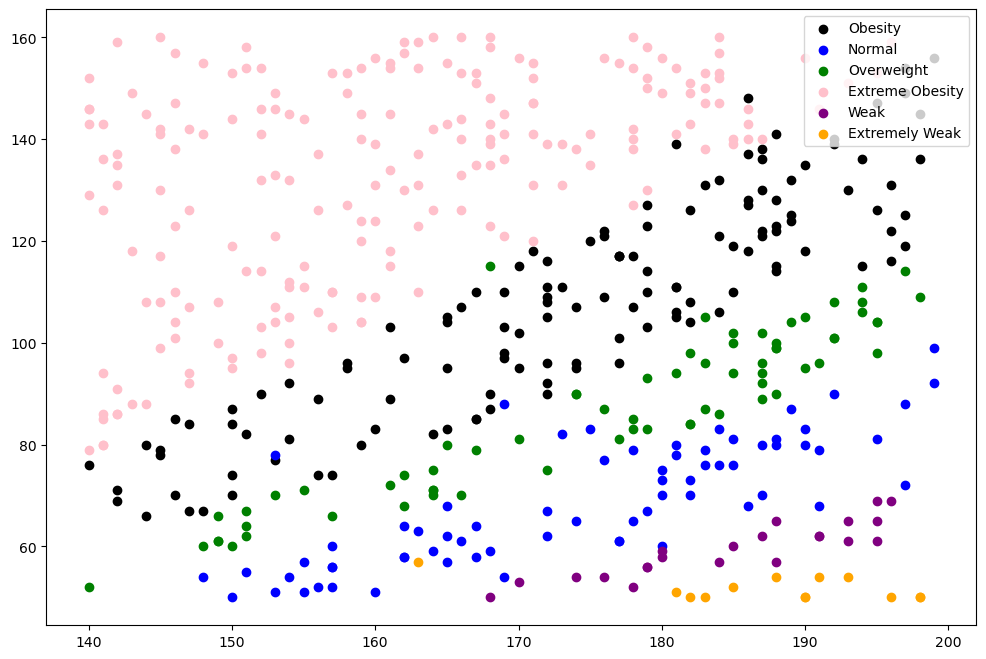

In [10]:
# 그래프 크기 조정
colors = ['black','blue','green','pink','purple','orange','purple']
plt.figure(figsize=(12,8))
for i in range(6):
    myScatter(bmi['Label'].unique()[i],colors[i])
plt.show()

In [11]:
display(bmi[(bmi['Label']=='Normal') & (bmi['Height']<160) & (bmi['Weight']>70)])
display(bmi[(bmi['Label']=='Overweight') & (bmi['Height']<170) & (bmi['Weight']>100)])

,Gender,Height,Weight,Label
231,Female,153,78,Normal


,Gender,Height,Weight,Label
149,Female,168,115,Overweight


In [12]:
bmi.loc[231,'Label'] = 'Obesity'
bmi.loc[149,'Label'] = 'Extreme Obesity'

### 모델 선택 및 하이퍼 파라미터 튜닝
- 머신러닝 모델을 불러와서 사용하는 단계
- 머신러닝 모델의 학습에 변화를 주고 싶다면 -> 하이퍼 파라미터 튜닝
- 하이퍼 파라미터 = 수정 가능한 파라미터

#### 모델 로드
- KNN 모델 : 머신러닝 모델

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_bmi = KNeighborsClassifier(n_neighbors=5) # 짝수 지양

#### 문제와 정답 분리

In [14]:
# 문제 = Height, Weight
X = bmi.loc[:,'Height':'Weight']
y = bmi.loc[:,'Label']

#### 훈련과 평가로 분리
- 훈련 : 평가 = 7 : 3

In [15]:
X_train = X[:350]
X_test = X[350:]
y_train = y[:350]
y_test = y[350:]

##### 훈련, 평가 데이터 분리 함수

In [16]:
from sklearn.model_selection import train_test_split
train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y, test_size = 0.3)
# shape으로 잘 들어왔는지 확인F

In [17]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((350, 2), (150, 2), (350,), (150,))

### 학습

In [18]:
# fit(문제, 정답)
# KNN 모델 BMI데이터를 학습 -> BMI데이터에 대한 규칙을 찾음
# X데이터(Height, Weight)를 통해서 y데이터(Label)의 규칙을 찾음
knn_bmi.fit(X_train,y_train)

KNeighborsClassifier()

### 평가
- 모델이 제대로 만들어졌는지 평가 = score
- 새로운 데이터에 대해서 예측 = predict

In [19]:
# 예측
# predict(문제)
# 문제는 2차원 데이터
knn_bmi.predict([[174,68]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Normal'], dtype=object)

In [20]:
# 만들어진 모델을 평가
# score(문제데이터, 정답데이터)
# 예측한 정답과 정답 데이터를 비교
knn_bmi.score(X_test,y_test)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8733333333333333

In [21]:
# 학습을 할 때 사용된 데이터이기 때문에 test 데이터보다 score값이 높음
knn_bmi.score(X_train,y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9542857142857143

### 하이퍼 파라미터 튜닝
- KNN모델의 하이퍼 파라미터(n_neighbors)의 변화에 따라 score값을 확인

In [41]:
# 반복문으로 변화를 줌!
# 점수를 저장할 list 생성
train_acc = []
test_acc = []

for i in range(1,31,2):
    knn_bmi = KNeighborsClassifier(n_neighbors=i)
    knn_bmi.fit(X_train,y_train)
    test_acc.append(knn_bmi.score(X_test,y_test))
    train_acc.append(knn_bmi.score(X_train,y_train))
    print(f'{i}번째 score : {knn_bmi.score(X_test,y_test)}')
bmiDF = pd.DataFrame({"train":train_acc,"test":test_acc},index=(range(1,31,2)))
bmiDF[bmiDF.loc[:,'test']==bmiDF.loc[:,'test'].max()]

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

1번째 score : 0.88
3번째 score : 0.9066666666666666
5번째 score : 0.8733333333333333
7번째 score : 0.8466666666666667
9번째 score : 0.9
11번째 score : 0.8933333333333333
13번째 score : 0.86
15번째 score : 0.86
17번째 score : 0.8466666666666667
19번째 score : 0.8533333333333334
21번째 score : 0.8266666666666667
23번째 score : 0.84
25번째 score : 0.8266666666666667
27번째 score : 0.8066666666666666
29번째 score : 0.8066666666666666


C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,train,test
3,0.957143,0.906667


,train,test
3,0.957143,0.906667


,train,test
1,1.0,0.88


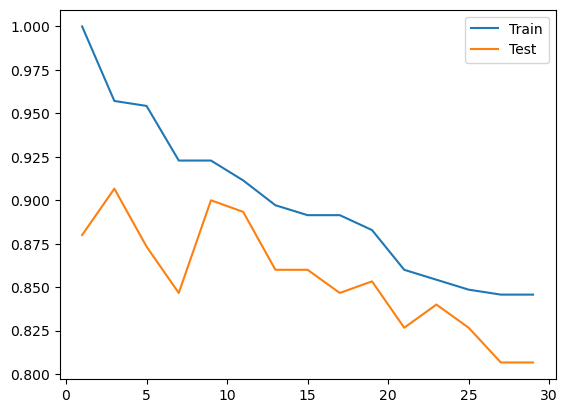

In [42]:
# 그래프 만들기
x = range(1,31,2)
plt.plot(x,train_acc,label="Train")
plt.plot(x,test_acc,label="Test")
plt.legend(loc='best')
display(bmiDF[bmiDF.loc[:,'test']==bmiDF.loc[:,'test'].max()])
display(bmiDF[bmiDF.loc[:,'train']==bmiDF.loc[:,'train'].max()])